# K Means Clustering

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


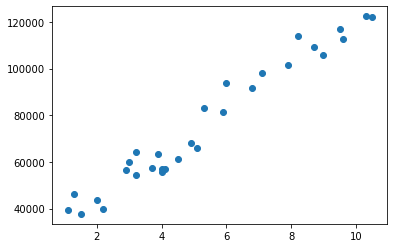

In [4]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted=km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df['cluster']=y_predicted
df.head()

,YearsExperience,Salary,cluster
0,1.1,39343.0,1
1,1.3,46205.0,1
2,1.5,37731.0,1
3,2.0,43525.0,1
4,2.2,39891.0,1


No handles with labels found to put in legend.


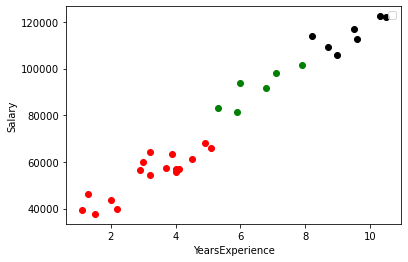

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [26]:
scaler=MinMaxScaler()
scaler.fit(df[['Salary']])
df['Salary']=scaler.transform(df[['Salary']])
scaler.fit(df[['YearsExperience']])
df['YearsExperience']=scaler.transform(df[['YearsExperience']])

df


,YearsExperience,Salary,cluster
0,0.000000,0.019041,1
1,0.021277,0.100094,1
2,0.042553,0.000000,1
3,0.095745,0.068438,1
4,0.117021,0.025514,1
5,0.191489,0.223376,1
6,0.202128,0.264812,1
7,0.223404,0.197425,1
8,0.223404,0.315545,1
9,0.276596,0.229837,1


In [28]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['YearsExperience','Salary']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

No handles with labels found to put in legend.


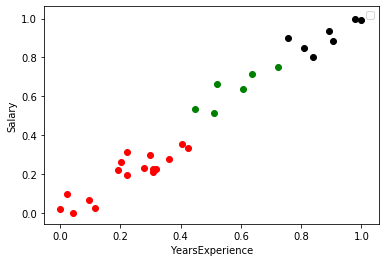

In [29]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [30]:
km.cluster_centers_

array([[0.86303191, 0.88906508],
       [0.19929078, 0.17935428],
       [0.50759878, 0.53702541]])

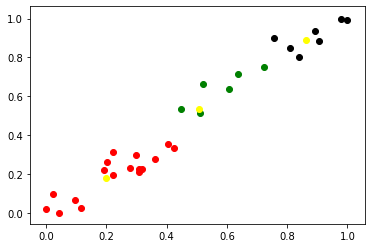

In [31]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.YearsExperience, df1['Salary'],color='green')
plt.scatter(df2.YearsExperience, df2['Salary'],color='red')
plt.scatter(df3.YearsExperience, df3['Salary'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow')

In [32]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)

In [33]:
sse

[5.684101493731802,
 1.1964172294563447,
 0.6617789294971546,
 0.2856507223864634,
 0.20365826506277962,
 0.14621099079652466,
 0.10586296297154271,
 0.08576384962602342,
 0.07009171844141443]

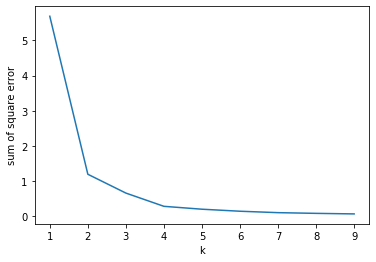

In [34]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)